In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# データの読み込み
df = pd.read_csv('../data/ks-projects-201801.csv')
print(df.shape)
df.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


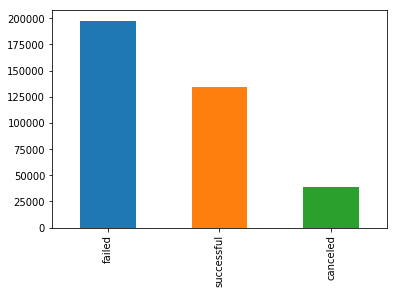

In [3]:
# 目的変数の条件を指定する
df['state'] = df['state'].apply(lambda x: x if x not in set(['live', 'undefined', 'suspended']) else None)
df['state'].value_counts().plot.bar()

In [4]:
# データフレーム全体に反映させる
dropped_df = df.dropna()
display(df.shape)
display(dropped_df.shape)

(378661, 15)

(370219, 15)

In [5]:
# ID のドロップ
dropped_df = dropped_df.drop('ID', axis=1)
display(dropped_df.shape)
dropped_df.head()

(370219, 14)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


0    False
1    False
2    False
3    False
4    False
Name: state, dtype: bool

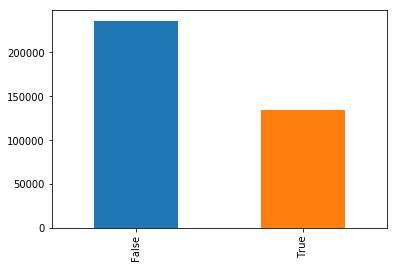

In [6]:
# successful or failed の二値化
y_bool = dropped_df['state'] == 'successful'
display(y_bool.head())
y_bool.value_counts().plot.bar()

# 説明変数の準備

In [7]:
# 数字以外の抽出, nameはドロップ
x_obj_df = dropped_df.select_dtypes(include=['O']).drop(['name', 'state'], axis=1)
# 数字の抽出, 事前には知り得ない情報はドロップ
x_num_df = dropped_df.goal
x_num_df.head()

0     1000.0
1    30000.0
2    45000.0
3     5000.0
4    19500.0
Name: goal, dtype: float64

In [8]:
# 説明変数の結合
x_df = pd.concat([x_obj_df, x_num_df], axis=1)
x_df.head()

,category,main_category,currency,deadline,launched,country,goal
0,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,GB,1000.0
1,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,US,30000.0
2,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,US,45000.0
3,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,US,5000.0
4,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,US,19500.0


# 方針
- 日付は差分を取って数値データに
- カテゴリカル変数はデータ数の少ないものはothersにまとめて数値化
- その後one-hotベクトルに

In [9]:
# 日付データに変更
df_date = pd.DataFrame()
for name in ['deadline', 'launched']:
    df_date[name] = pd.to_datetime(x_df[name])
# 日付の差分を取る
df_days = df_date['deadline'] - df_date['launched']
df_days.name = 'days'
# 日数に変更
df_days = df_days.astype('timedelta64[D]')
df_days.head()

0    58.0
1    59.0
2    44.0
3    29.0
4    55.0
Name: days, dtype: float64

Film & Video    62247
Music           49101
Publishing      39014
Games           34719
Technology      31761
Design          29515
Art             27862
Food            24263
Fashion         22424
Theater         10850
Comics          10720
Photography     10675
Crafts           8661
Journalism       4671
Dance            3736
Name: main_category, dtype: int64

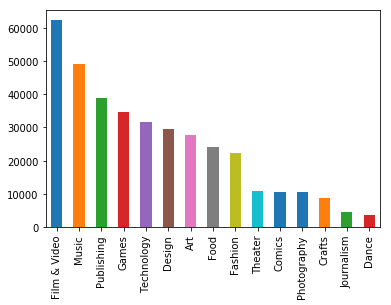

In [10]:
# main category
display(x_df.main_category.value_counts())
x_df.main_category.value_counts().plot.bar()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'others',
       'Games', 'Fashion', 'Art', 'Technology'], dtype=object)

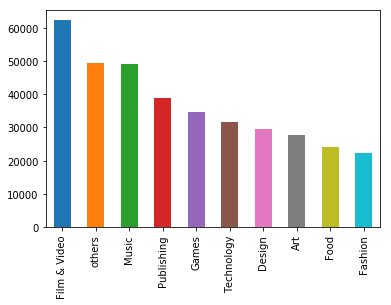

In [11]:
# しきい値より低い値を'others'にまとめる
main_cate_thread = 15000
main_cate_dict = x_df.main_category.value_counts().to_dict()
main_cate_df = x_df.main_category.apply(lambda x: x if main_cate_dict[x] > main_cate_thread else 'others')
display(main_cate_df.unique())
main_cate_df.value_counts().plot.bar()

USD    289669
GBP     33214
EUR     16743
CAD     14508
AUD      7681
SEK      1718
MXN      1632
NZD      1425
DKK      1083
CHF       736
NOK       694
HKD       564
SGD       521
JPY        31
Name: currency, dtype: int64

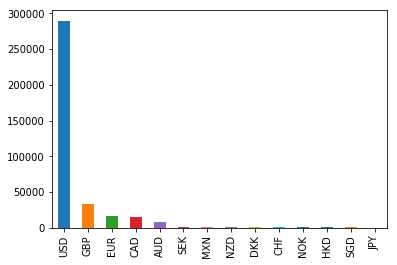

In [12]:
# currency
display(x_df.currency.value_counts())
x_df.currency.value_counts().plot.bar()

array(['GBP', 'USD', 'CAD', 'AUD', 'others', 'EUR'], dtype=object)

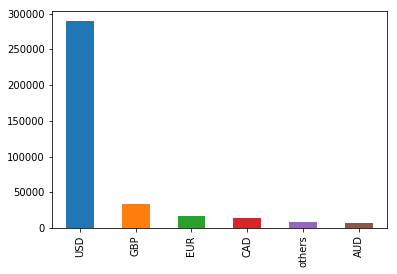

In [13]:
# しきい値より低い値を'others'にまとめる
currency_thread = 7000 # AUD以下
currency_dict = x_df.currency.value_counts().to_dict()
currency_df = x_df.currency.apply(lambda x: x if currency_dict[x] > currency_thread else 'others')
display(currency_df.unique())
currency_df.value_counts().plot.bar()

US    289669
GB     33214
CA     14508
AU      7681
DE      4057
FR      2873
NL      2807
IT      2775
ES      2204
SE      1718
MX      1632
NZ      1425
DK      1083
IE       793
CH       736
NO       694
BE       597
AT       576
HK       564
SG       521
LU        61
JP        31
Name: country, dtype: int64

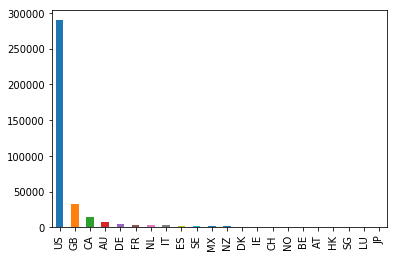

In [14]:
# country
display(x_df.country.value_counts())
x_df.country.value_counts().plot.bar()

array(['GB', 'US', 'CA', 'AU', 'others'], dtype=object)

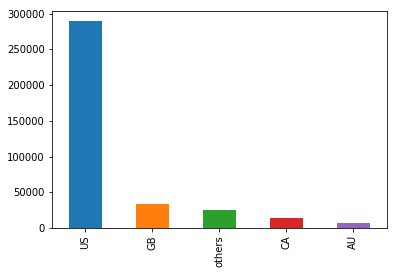

In [15]:
# しきい値より低い値を'others'にまとめる
country_thread = 7000 # AUD以下
country_dict = x_df.country.value_counts().to_dict()
country_df = x_df.country.apply(lambda x: x if country_dict[x] > country_thread else 'others')
display(country_df.unique())
country_df.value_counts().plot.bar()

Product Design       21886
Documentary          16065
Tabletop Games       14036
Music                13208
Shorts               12303
Video Games          11689
Food                 11395
Film & Video          9149
Fiction               9107
Fashion               8474
Nonfiction            8259
Art                   8155
Theater               7036
Apparel               7029
Technology            6742
Rock                  6717
Children's Books      6711
Apps                  6239
Webseries             5735
Photography           5729
Indie Rock            5639
Publishing            5452
Narrative Film        5168
Web                   5055
Comics                4973
Crafts                4603
Country & Folk        4428
Design                4122
Hip-Hop               3853
Hardware              3590
                     ...  
Couture                268
Blues                  265
Animals                247
Fabrication Tools      242
Printing               236
Makerspaces            235
M

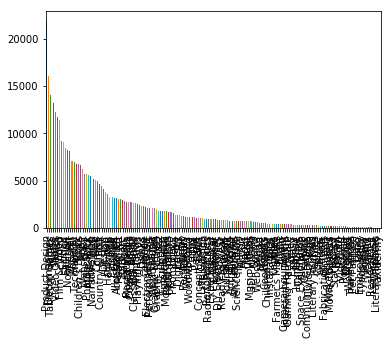

In [16]:
# category
display(x_df.category.value_counts())
x_df.category.value_counts().plot.bar()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'others', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Fiction', 'Accessories', 'Rock', 'Hardware', 'Software',
       'Gadgets', 'Web', 'Jazz', 'Ready-to-wear', 'Festivals',
       'Video Games', 'Publishing', 'Shorts', 'Electronic Music',
       'Radio & Podcasts', 'Apps', 'Apparel', 'Comedy', 'Hip-Hop',
       'Periodicals', 'Dance', 'Technology', 'Painting', 'World Music',
       'Photobooks', 'Drama', 'Young Adult', 'Mobile Games',
       'Playing Cards', "Children's Books", 'Performance Art',
       'Graphic Novels', 'Performances', 'Sculpture', 'Classical Music',
       'Graphic Design', 'Spaces', 'Country & F

(88,)

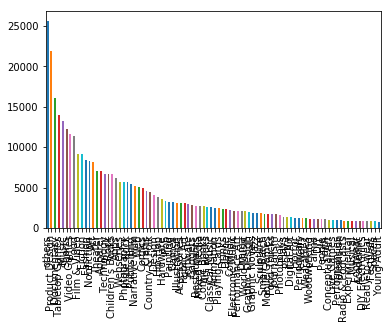

In [17]:
# しきい値より低い値を'others'にまとめる
cate_thread = 800 #x_df.category.value_counts()[int(one_sigma)] # = 2シグマ区間の151番目より小さい値をothersにまとめる
cate_dict = x_df.category.value_counts().to_dict()
cate_df = x_df.category.apply(lambda x: x if cate_dict[x] > cate_thread else 'others')
display(cate_df.unique())
display(cate_df.unique().shape)
cate_df.value_counts().plot.bar()

In [18]:
# 全部をまとめる <category, main_category, currency, country>
x_df_cate_sum = pd.concat([cate_df, main_cate_df, currency_df, country_df], axis=1)
x_df_cate_sum.head()

,category,main_category,currency,country
0,Poetry,Publishing,GBP,GB
1,Narrative Film,Film & Video,USD,US
2,Narrative Film,Film & Video,USD,US
3,Music,Music,USD,US
4,Film & Video,Film & Video,USD,US


In [19]:
# objectをカテゴリカルに変換
x_df_cate_num = pd.DataFrame()
for column in x_df_cate_sum.columns:
    labels, uniques = pd.factorize(x_df_cate_sum[column])
    x_df_cate_num[column] = labels
x_df_cate_num.head()

,category,main_category,currency,country
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,2,2,1,1
4,3,1,1,1


# 目的変数

In [20]:
# 目的変数を0,1に変換
y_df_num = pd.Series(pd.factorize(y_bool)[0], name='state')
y_df_num.shape

(370219,)

In [21]:
# 結合
df_scatter = pd.concat([y_df_num, x_df_cate_num, dropped_df.goal], axis=1)
df_scatter.head()

,state,category,main_category,currency,country,goal
0,0.0,0.0,0.0,0.0,0.0,1000.0
1,0.0,1.0,1.0,1.0,1.0,30000.0
2,0.0,1.0,1.0,1.0,1.0,45000.0
3,0.0,2.0,2.0,1.0,1.0,5000.0
4,0.0,3.0,1.0,1.0,1.0,19500.0


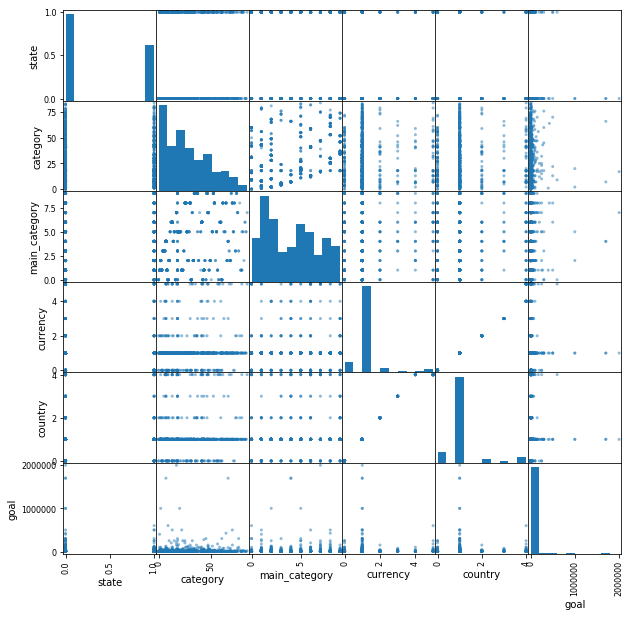

In [22]:
# 散布図を表示
pd.plotting.scatter_matrix(df_scatter.iloc[:1000, :], figsize=(10,10))
plt.show()

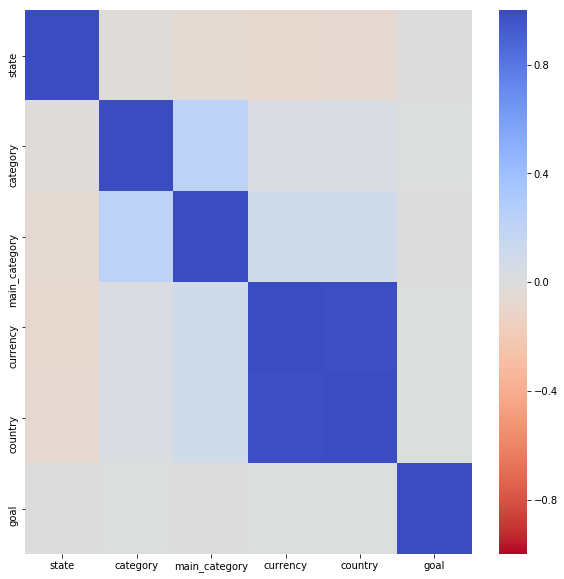

In [23]:
# 相関係数のヒートマップ表示
plt.figure(figsize=(10,10))
sns.heatmap(df_scatter.iloc[:,:].corr(), cmap="coolwarm_r", vmin=-1, vmax=1, center=0)

In [24]:
# カテゴリカルな説明変数をone hot に変換
x_df_one_hot = pd.get_dummies(x_df_cate_sum.iloc[:,:])
x_df_one_hot.head()

,category_Academic,category_Accessories,category_Animation,category_Apparel,category_Apps,category_Art,category_Art Books,category_Children's Books,category_Classical Music,category_Comedy,...,currency_CAD,currency_EUR,currency_GBP,currency_USD,currency_others,country_AU,country_CA,country_GB,country_US,country_others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# 説明変数を結合 
# goalを入れると精度が下がる
x_df_sum = pd.concat([x_df_one_hot, df_days, x_df.goal], axis=1)
display(x_df_sum.shape)
x_df_sum.head()

(370219, 111)

,category_Academic,category_Accessories,category_Animation,category_Apparel,category_Apps,category_Art,category_Art Books,category_Children's Books,category_Classical Music,category_Comedy,...,currency_GBP,currency_USD,currency_others,country_AU,country_CA,country_GB,country_US,country_others,days,goal
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,58.0,1000.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,59.0,30000.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,44.0,45000.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,29.0,5000.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,55.0,19500.0


# 前処理済みデータの保存

In [26]:
x_df_sum.to_csv('../data/one_hot.csv', index=None)

In [27]:
y_bool.to_csv('../data/y_binary.csv', index=None)

# 学習の実行

In [28]:
# Model
from sklearn.linear_model import SGDClassifier
# Data process
from sklearn.model_selection import KFold, train_test_split
# Metrics
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
# Feature Selectioon
from sklearn.feature_selection import RFECV

In [29]:
# データの読み込み
x_data_df = pd.read_csv('../data/one_hot.csv')
display(x_data_df.shape)
x_data_df.head()

(370219, 111)

,category_Academic,category_Accessories,category_Animation,category_Apparel,category_Apps,category_Art,category_Art Books,category_Children's Books,category_Classical Music,category_Comedy,...,currency_GBP,currency_USD,currency_others,country_AU,country_CA,country_GB,country_US,country_others,days,goal
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,58.0,1000.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,59.0,30000.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,44.0,45000.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,29.0,5000.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,55.0,19500.0


In [30]:
y_data_df = pd.read_csv('../data/y_binary.csv', header=None, names=['state'])
display(y_data_df.shape)
y_data_df.head()

(370219, 1)

,state
0,False
1,False
2,False
3,False
4,False


In [31]:
X = x_data_df.values
y = y_data_df.values.astype(int) * 1
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296175, 111)

(74044, 111)

(296175, 1)

(74044, 1)

In [32]:
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_log_like = 0
cross_valid_acc = 0
split_num = 1

# 検証役を交代させながら学習と評価を繰り返す
regr = []
# 配列の定義
y_pred_test = np.empty((len(X_test), n_split))

for i, (train_idx, valid_idx) in enumerate(KFold(n_splits=n_split, random_state=None).split(X_train)):
    train_x, train_y = X_train[train_idx], y_train[train_idx] #学習用データ
    valid_x, valid_y = X_train[valid_idx], y_train[valid_idx]     #検証用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr.append(SGDClassifier(loss="log", penalty="none", max_iter=100, fit_intercept=False))
    regr[i].fit(train_x, train_y)

    # 検証データに対する予測を実行
    y_pred_valid = regr[i].predict(valid_x)
    
    # 検証データに対する対数尤度を計算
    log_like = - log_loss(valid_y, y_pred_valid)
    acc = accuracy_score(valid_y, y_pred_valid)
    print("Fold %s"%split_num)
    print("対数尤度 = %s"%round(log_like, 3))
    print('正答率 = {:.3f}%'.format(100 * acc))
    print()
    
    cross_valid_log_like += log_like #後で平均を取るためにLog Likelihoodを加算
    cross_valid_acc += 100 * acc
    split_num += 1
    
    # テストデータの予測
    # 配列の列方向に予測結果を挿入していく
    y_pred_test[:,i] = regr[i].predict(X_test)
    # テストデータに対する対数尤度を計算
    test_log_like = - log_loss(y_test, y_pred_test[:,i])
    test_acc = accuracy_score(y_test, y_pred_test[:,i])
    print("テスト: 対数尤度 = %s"%round(test_log_like, 3))
    print('テスト: 正答率 = {:.3f}%'.format(100 * test_acc))
    print()

# MAEの平均値を最終的な汎化誤差値とする
final_log_like = cross_valid_log_like / n_split
final_acc = cross_valid_acc / n_split
print("Cross Validation 対数尤度 = %s"%round(final_log_like, 3))
print("Cross Validation 正答率 = %s"%round(final_acc, 3))

# テスト
y_pred_test.shape

/Users/yamaokadaichi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1
対数尤度 = -15.407
正答率 = 55.393%

テスト: 対数尤度 = -15.451
テスト: 正答率 = 55.264%

Fold 2
対数尤度 = -16.628
正答率 = 51.858%

テスト: 対数尤度 = -16.665
テスト: 正答率 = 51.750%

Fold 3
対数尤度 = -22.096
正答率 = 36.026%

テスト: 対数尤度 = -22.032
テスト: 正答率 = 36.211%

Fold 4
対数尤度 = -14.63
正答率 = 57.643%

テスト: 対数尤度 = -14.721
テスト: 正答率 = 57.378%

Fold 5
対数尤度 = -13.861
正答率 = 59.870%

テスト: 対数尤度 = -13.863
テスト: 正答率 = 59.863%

Cross Validation 対数尤度 = -16.524
Cross Validation 正答率 = 52.158


(74044, 5)

### KFold後のそれぞれのfoldでの結果を総合して計算

In [33]:
# 予測結果から合計して3以上を1,else 0→精度を再算出
y_pred_test_sum = (y_pred_test.sum(axis=1) > 3) * 1
display(y_pred_test_sum.shape)
# テストデータに対する対数尤度を計算
test_log_like = - log_loss(y_test, y_pred_test_sum)
test_acc = accuracy_score(y_test, y_pred_test_sum)
print("テスト: 対数尤度 = %s"%round(test_log_like, 3))
print('テスト: 正答率 = {:.3f}%'.format(100 * test_acc))

(74044,)

テスト: 対数尤度 = -14.72
テスト: 正答率 = 57.382%


# Day2の前処理データを使用

In [34]:
# データの読み込み
x_data_df = pd.read_csv('../data/day2_onehot.csv')
display(x_data_df.shape)
x_data_df.head()

(378661, 120)

,state,category_Academic,category_Accessories,category_Action,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,...,currency_GBP,currency_USD,currency_others,country_AU,country_CA,country_GB,country_US,country_others,days,goal
0,False,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,58.0,1000.0
1,False,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,59.0,30000.0
2,False,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,44.0,45000.0
3,False,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,29.0,5000.0
4,False,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,55.0,19500.0


In [35]:
y_data_df = x_data_df.pop('state')
display(y_data_df.shape)
y_data_df.head()

(378661,)

0    False
1    False
2    False
3    False
4    False
Name: state, dtype: bool

## 標準化

In [41]:
x_data_df

,category_Academic,category_Accessories,category_Action,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,...,currency_GBP,currency_USD,currency_others,country_AU,country_CA,country_GB,country_US,country_others,days,goal
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,58.0,1000.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,59.0,30000.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,44.0,45000.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,29.0,5000.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,55.0,19500.0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,34.0,50000.0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,19.0,1000.0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,44.0,25000.0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,34.0,125000.0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,29.0,65000.0


In [36]:
X = x_data_df.values
y = y_data_df.values.astype(int) * 1
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(302928, 119)

(75733, 119)

(302928,)

(75733,)

In [37]:
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_log_like = 0
cross_valid_acc = 0
split_num = 1

# 検証役を交代させながら学習と評価を繰り返す
regr = []
# 配列の定義
y_pred_test = np.empty((len(X_test), n_split))

for i, (train_idx, valid_idx) in enumerate(KFold(n_splits=n_split, random_state=None).split(X_train)):
    train_x, train_y = X_train[train_idx], y_train[train_idx] #学習用データ
    valid_x, valid_y = X_train[valid_idx], y_train[valid_idx]     #検証用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr.append(SGDClassifier(loss="log", penalty="none", max_iter=100, fit_intercept=False))
    regr[i].fit(train_x, train_y)

    # 検証データに対する予測を実行
    y_pred_valid = regr[i].predict(valid_x)
    
    # 検証データに対する対数尤度を計算
    log_like = - log_loss(valid_y, y_pred_valid)
    acc = accuracy_score(valid_y, y_pred_valid)
    print("Fold %s"%split_num)
    print("対数尤度 = %s"%round(log_like, 3))
    print('正答率 = {:.3f}%'.format(100 * acc))
    print()
    
    cross_valid_log_like += log_like #後で平均を取るためにLog Likelihoodを加算
    cross_valid_acc += 100 * acc
    split_num += 1
    
    # テストデータの予測
    # 配列の列方向に予測結果を挿入していく
    y_pred_test[:,i] = regr[i].predict(X_test)
    # テストデータに対する対数尤度を計算
    test_log_like = - log_loss(y_test, y_pred_test[:,i])
    test_acc = accuracy_score(y_test, y_pred_test[:,i])
    print("テスト: 対数尤度 = %s"%round(test_log_like, 3))
    print('テスト: 正答率 = {:.3f}%'.format(100 * test_acc))
    print()

# MAEの平均値を最終的な汎化誤差値とする
final_log_like = cross_valid_log_like / n_split
final_acc = cross_valid_acc / n_split
print("Cross Validation 対数尤度 = %s"%round(final_log_like, 3))
print("Cross Validation 正答率 = %s"%round(final_acc, 3))

# テスト
y_pred_test.shape

Fold 1
対数尤度 = -13.53
正答率 = 60.826%

テスト: 対数尤度 = -13.467
テスト: 正答率 = 61.009%

Fold 2
対数尤度 = -16.302
正答率 = 52.803%

テスト: 対数尤度 = -16.31
テスト: 正答率 = 52.779%

Fold 3
対数尤度 = -13.875
正答率 = 59.829%

テスト: 対数尤度 = -13.831
テスト: 正答率 = 59.957%

Fold 4
対数尤度 = -12.227
正答率 = 64.600%

テスト: 対数尤度 = -12.154
テスト: 正答率 = 64.811%

Fold 5
対数尤度 = -15.683
正答率 = 54.594%

テスト: 対数尤度 = -15.691
テスト: 正答率 = 54.571%

Cross Validation 対数尤度 = -14.323
Cross Validation 正答率 = 58.53


(75733, 5)

### KFold後のそれぞれのfoldでの結果を総合して計算

In [38]:
# 予測結果から合計して3以上を1,else 0→精度を再算出
y_pred_test_sum = (y_pred_test.sum(axis=1) > 3) * 1
display(y_pred_test_sum.shape)
# テストデータに対する対数尤度を計算
test_log_like = - log_loss(y_test, y_pred_test_sum)
test_acc = accuracy_score(y_test, y_pred_test_sum)
print("テスト: 対数尤度 = %s"%round(test_log_like, 3))
print('テスト: 正答率 = {:.3f}%'.format(100 * test_acc))

(75733,)

テスト: 対数尤度 = -13.467
テスト: 正答率 = 61.010%


# 標準化

In [39]:
# 標準化
from sklearn.preprocessing import StandardScaler

In [45]:
stdsc = StandardScaler()
x_df_std = x_df_sum
x_df_std['std_days'] = stdsc.fit_transform(x_data_df['days'].values.reshape(-1,1))
x_df_std['std_goal'] = stdsc.fit_transform(x_data_df['goal'].values.reshape(-1,1))
x_df_std.head()

ValueError: Length of values does not match length of index

In [44]:
x_data_df

,category_Academic,category_Accessories,category_Action,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,category_Art Books,...,currency_GBP,currency_USD,currency_others,country_AU,country_CA,country_GB,country_US,country_others,days,goal
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,58.0,1000.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,59.0,30000.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,44.0,45000.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,29.0,5000.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,55.0,19500.0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,34.0,50000.0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,19.0,1000.0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,44.0,25000.0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,34.0,125000.0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,29.0,65000.0
